In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_combined_ratio = pd.read_csv('data_combined_ratio.csv')

In [2]:
data_Heroin = data_combined_ratio.drop(data_combined_ratio.loc[data_combined_ratio['SubstanceName'] != 'Oxycodone'].index)

In [3]:
data_Heroin['population_ratio'] = (data_Heroin['DrugReports']/data_Heroin['popultion'])*100

In [4]:
columns = data_Heroin.columns[10:101]

In [5]:
data_Hero = data_Heroin.drop(data_Heroin.loc[data_Heroin['SubstanceName'] != 'Oxycodone'].index)
Heroin_corr = []
for heading in columns:
    column_1 = data_Hero[heading]
    column_2 = data_Hero["population_ratio"]
    correlation = column_2.corr(column_1)
    Heroin_corr.append(correlation)

print(Heroin_corr)

[0.03671037038430657, -0.14119330743066985, 0.11774326532390002, 0.12778150343085634, 0.18109817839968326, -0.09129649412442888, 0.21157779275660626, -0.1315572674425952, 0.043721472638428835, 0.13912274372655667, 0.10279968020576723, -0.06985434818244882, -0.11228612165329888, -0.15761140034994076, 0.133203898825635, -0.12220761060001913, 0.0044036458811570825, -0.12182950812429694, -0.11483574650586546, 0.07385913481910956, -0.1408954231100418, 0.1617794774475692, 0.23406024022553723, -0.1112240903533627, 0.0890599257046413, -0.14179065276337327, 0.19925887827574032, 0.2205032005588025, -0.09528887618621829, 0.1402548338981446, 0.12179129164525045, 0.2800287278644237, -0.08477736465368858, -0.10895083229082445, 0.012671511636523212, 0.15784984677996228, -0.10169227615208802, -0.04731535149007813, -0.1135195717696613, 0.34906256061010765, 0.15079315241424862, -0.14566252570573485, -0.1686604003310018, -0.14710967575033307, -0.2200243497974066, -0.11277844290094606, -0.1387665354981829

In [10]:
y_svr_mse = []
y_ridge_mse = []
y_fcn_mse = []
y_svr_mae = []
y_ridge_mae = []
y_fcn_mae = []
x = []

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import tensorflow as tf

In [13]:
for i in range(5,38):
    x.append(i)
    feature = []
    Heroin_top_20_idx = np.argsort(np.abs(Heroin_corr))[-i:]
    for idx in Heroin_top_20_idx:
        feature.append(columns[idx])
        
    data_combined_ratio = pd.read_csv('data_combined_ratio.csv')
    data_combined_ratio['population_ratio'] = (data_combined_ratio['DrugReports']/data_combined_ratio['popultion'])*100
    Heroin_data = data_combined_ratio.loc[(data_combined_ratio['SubstanceName'] == 'Oxycodone')]
    Heroin_data_train = Heroin_data.loc[(Heroin_data['YYYY'] <= 2015)]
    Heroin_data_test = Heroin_data.loc[(Heroin_data['YYYY'] == 2016)]
    Heroin_data_train_x = Heroin_data_train.iloc[:, 10:102]
    Heroin_data_train_y = Heroin_data_train.iloc[:, 102]
    Heroin_data_test_x = Heroin_data_test.iloc[:, 10:102]
    Heroin_data_test_y = Heroin_data_test.iloc[:, 102]
    
    
    Heroin_feature_chosen_10 = feature
    Heroin_data_train_x_chosen = Heroin_data_train_x[Heroin_feature_chosen_10]
    Heroin_data_test_x_chosen = Heroin_data_test_x[Heroin_feature_chosen_10]
    
    
    #svr start here
    regr_svr = SVR(kernel="rbf", C=1, gamma=0.1, epsilon=0.1)
    regr_svr.fit(Heroin_data_train_x_chosen, Heroin_data_train_y)
    print(f"test score:", regr_svr.score(Heroin_data_test_x_chosen, Heroin_data_test_y))
    svr_predict = regr_svr.predict(Heroin_data_test_x_chosen)
    
    Heroin_data_test["predict_ratio"] = svr_predict
    Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
    print(mean_absolute_error(np.array(Heroin_data_test["predict_number"]), np.array(Heroin_data_test["DrugReports"])))
    print(mean_squared_error(np.array(Heroin_data_test["predict_number"]), np.array(Heroin_data_test["DrugReports"])))
    y_svr_mse.append(mean_squared_error(np.array(Heroin_data_test["predict_number"]), np.array(Heroin_data_test["DrugReports"])))
    y_svr_mae.append(mean_absolute_error(np.array(Heroin_data_test["predict_number"]), np.array(Heroin_data_test["DrugReports"])))

    
    #ridge start here
    regr_ridge = Ridge(fit_intercept = False, solver='sparse_cg')
    regr_ridge.fit(Heroin_data_train_x_chosen, Heroin_data_train_y)
    print(f"test score:", regr_ridge.score(Heroin_data_test_x_chosen, Heroin_data_test_y))
    ridge_predict = regr_ridge.predict(Heroin_data_test_x_chosen)
    Heroin_data_test["predict_ratio"] = ridge_predict
    Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
    print(mean_absolute_error(np.array(Heroin_data_test["predict_number"]), np.array(Heroin_data_test["DrugReports"])))
    print(mean_squared_error(np.array(Heroin_data_test["predict_number"]), np.array(Heroin_data_test["DrugReports"])))
    y_ridge_mse.append(mean_squared_error(np.array(Heroin_data_test["predict_number"]), np.array(Heroin_data_test["DrugReports"])))
    y_ridge_mae.append(mean_absolute_error(np.array(Heroin_data_test["predict_number"]), np.array(Heroin_data_test["DrugReports"])))
                                        
                                        
    #fcn start here
    model_best = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(10, name="layer1"),
            tf.keras.layers.Dense(10, name="layer2"),
            tf.keras.layers.Dense(26, name="layer3"),
            tf.keras.layers.Dense(10, name="layer4"),
            tf.keras.layers.Dense(4, name="layer5"),
            tf.keras.layers.Dense(1, activation='sigmoid', name="layer6"),
        ]
    )
    model_best.compile(loss='binary_crossentropy')
    model_best.fit(Heroin_data_train_x_chosen, Heroin_data_train_y, epochs=100, batch_size=10)
    predictions = model_best.predict(Heroin_data_test_x_chosen)
    prediction_number = (Heroin_data_test["popultion"]*predictions.flatten())/100
    print(mean_absolute_error(np.array(prediction_number), np.array(Heroin_data_test["DrugReports"])))
    print(mean_squared_error(np.array(prediction_number), np.array(Heroin_data_test["DrugReports"])))
    y_fcn_mse.append(mean_squared_error(np.array(prediction_number), np.array(Heroin_data_test["DrugReports"])))
    y_fcn_mae.append(mean_absolute_error(np.array(prediction_number), np.array(Heroin_data_test["DrugReports"])))

test score: -2.3565847786480196
74.27408894766492
25018.320012227487
test score: -0.10524155621731346
25.190871748511913
3161.598805092824
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 755us/step - loss: 0.2719
Epoch 2/100
240/240 [==============================] - 0s 770us/step - loss: 0.2556
Epoch 3/100
240/240 [==============================] - 0s 761us/step - loss: 0.2522
Epoch 4/100
240/240 [==============================] - 0s 755us/step - loss: 0.2480
Epoch 5/100
240/240 [==============================] - 0s 777us/step - loss: 0.2450
Epoch 6/100
240/240 [==============================] - 0s 716us/step - loss: 0.2427
Epoch 7/100
240/240 [==============================] - 0s 734us/step - loss: 0.2421
Epoch 8/100
240/240 [==============================] - 0s 746us/step - loss: 0.2401
Epoch 9/100
240/240 [==============================] - 0s 725us/step - loss: 0.2396
Epoch 10/100
240/240 [==============================] - 0s 767us/step - loss: 0.2375
Epoch 11/100
240/240 [==============================] - 0s 772us/step - loss: 0.2370
Epoch 12/100
240/240 [==============================] - 0s 737us/step - loss: 0.2357
E

240/240 [==============================] - 0s 747us/step - loss: 0.2330
Epoch 98/100
240/240 [==============================] - 0s 787us/step - loss: 0.2332
Epoch 99/100
240/240 [==============================] - 0s 767us/step - loss: 0.2327
Epoch 100/100
240/240 [==============================] - 0s 755us/step - loss: 0.2332
19.137436101084624
1930.604110508224
test score: -2.6642935683725386
81.70011473305256
29184.924298265236
test score: -0.10496414159677658
25.186471179903496
3131.3482974068866
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 807us/step - loss: 0.2663
Epoch 2/100
240/240 [==============================] - 0s 746us/step - loss: 0.2496
Epoch 3/100
240/240 [==============================] - 0s 745us/step - loss: 0.2467
Epoch 4/100
240/240 [==============================] - 0s 751us/step - loss: 0.2437
Epoch 5/100
240/240 [==============================] - 0s 748us/step - loss: 0.2425
Epoch 6/100
240/240 [==============================] - 0s 777us/step - loss: 0.2416
Epoch 7/100
240/240 [==============================] - 0s 770us/step - loss: 0.2408
Epoch 8/100
240/240 [==============================] - 0s 782us/step - loss: 0.2403
Epoch 9/100
240/240 [==============================] - 0s 754us/step - loss: 0.2400
Epoch 10/100
240/240 [==============================] - 0s 775us/step - loss: 0.2391
Epoch 11/100
240/240 [==============================] - 0s 773us/step - loss: 0.2392
Epoch 12/100
240/240 [==============================] - 0s 755us/step - loss: 0.2381
E

240/240 [==============================] - 0s 724us/step - loss: 0.2328
Epoch 98/100
240/240 [==============================] - 0s 749us/step - loss: 0.2329
Epoch 99/100
240/240 [==============================] - 0s 794us/step - loss: 0.2327
Epoch 100/100
240/240 [==============================] - 0s 766us/step - loss: 0.2329
22.699203438646087
2121.6695714041693
test score: -2.915942135154461
83.01561834714933
29853.28485143378
test score: -0.10499097885041109
25.191059673284332
3140.296576735606
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 796us/step - loss: 0.2721
Epoch 2/100
240/240 [==============================] - 0s 745us/step - loss: 0.2493
Epoch 3/100
240/240 [==============================] - 0s 750us/step - loss: 0.2464
Epoch 4/100
240/240 [==============================] - 0s 737us/step - loss: 0.2431
Epoch 5/100
240/240 [==============================] - 0s 740us/step - loss: 0.2421
Epoch 6/100
240/240 [==============================] - 0s 790us/step - loss: 0.2407
Epoch 7/100
240/240 [==============================] - 0s 772us/step - loss: 0.2406
Epoch 8/100
240/240 [==============================] - 0s 769us/step - loss: 0.2389
Epoch 9/100
240/240 [==============================] - 0s 794us/step - loss: 0.2385
Epoch 10/100
240/240 [==============================] - 0s 785us/step - loss: 0.2391
Epoch 11/100
240/240 [==============================] - 0s 783us/step - loss: 0.2378
Epoch 12/100
240/240 [==============================] - 0s 792us/step - loss: 0.2372
E

240/240 [==============================] - 0s 754us/step - loss: 0.2333
Epoch 98/100
240/240 [==============================] - 0s 770us/step - loss: 0.2330
Epoch 99/100
240/240 [==============================] - 0s 760us/step - loss: 0.2332
Epoch 100/100
240/240 [==============================] - 0s 759us/step - loss: 0.2331
19.273855165307584
2158.6224013463298
test score: -3.0007336492856185
86.66303911622771
32856.12125785422
test score: -0.10569735157801574
25.08980244353192
3146.030068068253
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 809us/step - loss: 0.3803
Epoch 2/100
240/240 [==============================] - 0s 755us/step - loss: 0.2508
Epoch 3/100
240/240 [==============================] - 0s 778us/step - loss: 0.2462
Epoch 4/100
240/240 [==============================] - 0s 788us/step - loss: 0.2441
Epoch 5/100
240/240 [==============================] - 0s 793us/step - loss: 0.2423
Epoch 6/100
240/240 [==============================] - 0s 767us/step - loss: 0.2405
Epoch 7/100
240/240 [==============================] - 0s 742us/step - loss: 0.2407
Epoch 8/100
240/240 [==============================] - 0s 756us/step - loss: 0.2388
Epoch 9/100
240/240 [==============================] - 0s 751us/step - loss: 0.2392
Epoch 10/100
240/240 [==============================] - 0s 745us/step - loss: 0.2389
Epoch 11/100
240/240 [==============================] - 0s 749us/step - loss: 0.2381
Epoch 12/100
240/240 [==============================] - 0s 770us/step - loss: 0.2377
E

240/240 [==============================] - 0s 786us/step - loss: 0.2331
Epoch 98/100
240/240 [==============================] - 0s 783us/step - loss: 0.2331
Epoch 99/100
240/240 [==============================] - 0s 797us/step - loss: 0.2329
Epoch 100/100
240/240 [==============================] - 0s 788us/step - loss: 0.2329
19.15044846744151
2125.1944241947317
test score: -3.008781400603838
86.84379259866242
33049.58754002238
test score: -0.08246998575354136
21.023354449506208
1512.4992797193675


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Epoch 1/100
240/240 [==============================] - 1s 782us/step - loss: 0.2905
Epoch 2/100
240/240 [==============================] - 0s 762us/step - loss: 0.2670
Epoch 3/100
240/240 [==============================] - 0s 757us/step - loss: 0.2566
Epoch 4/100
240/240 [==============================] - 0s 774us/step - loss: 0.2506
Epoch 5/100
240/240 [==============================] - 0s 767us/step - loss: 0.2449
Epoch 6/100
240/240 [==============================] - 0s 762us/step - loss: 0.2436
Epoch 7/100
240/240 [==============================] - 0s 748us/step - loss: 0.2425
Epoch 8/100
240/240 [==============================] - 0s 757us/step - loss: 0.2402
Epoch 9/100
240/240 [==============================] - 0s 769us/step - loss: 0.2387
Epoch 10/100
240/240 [==============================] - 0s 753us/step - loss: 0.2381
Epoch 11/100
240/240 [==============================] - 0s 761us/step - loss: 0.2381
Epoch 12/100
240/240 [==============================] - 0s 751us/step - lo

240/240 [==============================] - 0s 770us/step - loss: 0.2323
Epoch 98/100
240/240 [==============================] - 0s 774us/step - loss: 0.2321
Epoch 99/100
240/240 [==============================] - 0s 780us/step - loss: 0.2320
Epoch 100/100
240/240 [==============================] - 0s 780us/step - loss: 0.2319
20.678774956869113
1614.4639675042383
test score: -3.0810402194047883
87.86564460190651
33698.804834730945
test score: -0.10815414876640395
20.858877927154715
1463.3038396251463
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 783us/step - loss: 0.2880
Epoch 2/100
240/240 [==============================] - 0s 786us/step - loss: 0.2489
Epoch 3/100
240/240 [==============================] - 0s 783us/step - loss: 0.2436
Epoch 4/100
240/240 [==============================] - 0s 778us/step - loss: 0.2425
Epoch 5/100
240/240 [==============================] - 0s 786us/step - loss: 0.2406
Epoch 6/100
240/240 [==============================] - 0s 784us/step - loss: 0.2386
Epoch 7/100
240/240 [==============================] - 0s 780us/step - loss: 0.2377
Epoch 8/100
240/240 [==============================] - 0s 796us/step - loss: 0.2374
Epoch 9/100
240/240 [==============================] - 0s 781us/step - loss: 0.2368
Epoch 10/100
240/240 [==============================] - 0s 783us/step - loss: 0.2364
Epoch 11/100
240/240 [==============================] - 0s 779us/step - loss: 0.2357
Epoch 12/100
240/240 [==============================] - 0s 781us/step - loss: 0.2362
E

240/240 [==============================] - 0s 815us/step - loss: 0.2318
Epoch 98/100
240/240 [==============================] - 0s 780us/step - loss: 0.2319
Epoch 99/100
240/240 [==============================] - 0s 778us/step - loss: 0.2321
Epoch 100/100
240/240 [==============================] - 0s 783us/step - loss: 0.2323
20.00886455486272
1494.8078793594575
test score: -3.5328086434917836
94.21158349064747
38947.24547077893
test score: -0.0994384457290185
20.686479757352817
1440.546933353257
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 793us/step - loss: 0.3422
Epoch 2/100
240/240 [==============================] - 0s 774us/step - loss: 0.2675
Epoch 3/100
240/240 [==============================] - 0s 810us/step - loss: 0.2515
Epoch 4/100
240/240 [==============================] - 0s 777us/step - loss: 0.2476
Epoch 5/100
240/240 [==============================] - 0s 782us/step - loss: 0.2442
Epoch 6/100
240/240 [==============================] - 0s 783us/step - loss: 0.2424
Epoch 7/100
240/240 [==============================] - 0s 779us/step - loss: 0.2402
Epoch 8/100
240/240 [==============================] - 0s 776us/step - loss: 0.2388
Epoch 9/100
240/240 [==============================] - 0s 791us/step - loss: 0.2387
Epoch 10/100
240/240 [==============================] - 0s 777us/step - loss: 0.2380
Epoch 11/100
240/240 [==============================] - 0s 780us/step - loss: 0.2374
Epoch 12/100
240/240 [==============================] - 0s 774us/step - loss: 0.2365
E

240/240 [==============================] - 0s 776us/step - loss: 0.2321
Epoch 98/100
240/240 [==============================] - 0s 782us/step - loss: 0.2322
Epoch 99/100
240/240 [==============================] - 0s 793us/step - loss: 0.2323
Epoch 100/100
240/240 [==============================] - 0s 773us/step - loss: 0.2320
19.13769877688144
1602.067507503775
test score: -3.527643141989416
94.28179306417977
39034.702413317085
test score: -0.0941798578535149
20.34403557445675
1430.4360342011203
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 792us/step - loss: 0.3227
Epoch 2/100
240/240 [==============================] - 0s 728us/step - loss: 0.2491
Epoch 3/100
240/240 [==============================] - 0s 739us/step - loss: 0.2453
Epoch 4/100
240/240 [==============================] - 0s 772us/step - loss: 0.2431
Epoch 5/100
240/240 [==============================] - 0s 796us/step - loss: 0.2406
Epoch 6/100
240/240 [==============================] - 0s 778us/step - loss: 0.2403
Epoch 7/100
240/240 [==============================] - 0s 785us/step - loss: 0.2385
Epoch 8/100
240/240 [==============================] - 0s 778us/step - loss: 0.2384
Epoch 9/100
240/240 [==============================] - 0s 777us/step - loss: 0.2374
Epoch 10/100
240/240 [==============================] - 0s 729us/step - loss: 0.2368
Epoch 11/100
240/240 [==============================] - 0s 804us/step - loss: 0.2366
Epoch 12/100
240/240 [==============================] - 0s 784us/step - loss: 0.2366
E

240/240 [==============================] - 0s 779us/step - loss: 0.2324
Epoch 98/100
240/240 [==============================] - 0s 789us/step - loss: 0.2325
Epoch 99/100
240/240 [==============================] - 0s 782us/step - loss: 0.2323
Epoch 100/100
240/240 [==============================] - 0s 790us/step - loss: 0.2322
22.690851639780643
1677.5149816489445
test score: -3.6079298048679718
94.73822388628147
39265.22251231376
test score: -0.09501185188446293
20.348043188127548
1419.7434163062921
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 752us/step - loss: 0.3354
Epoch 2/100
240/240 [==============================] - 0s 738us/step - loss: 0.2556
Epoch 3/100
240/240 [==============================] - 0s 766us/step - loss: 0.2465
Epoch 4/100
240/240 [==============================] - 0s 730us/step - loss: 0.2416
Epoch 5/100
240/240 [==============================] - 0s 776us/step - loss: 0.2405
Epoch 6/100
240/240 [==============================] - 0s 755us/step - loss: 0.2394
Epoch 7/100
240/240 [==============================] - 0s 776us/step - loss: 0.2390
Epoch 8/100
240/240 [==============================] - 0s 799us/step - loss: 0.2379
Epoch 9/100
240/240 [==============================] - 0s 762us/step - loss: 0.2378
Epoch 10/100
240/240 [==============================] - 0s 776us/step - loss: 0.2366
Epoch 11/100
240/240 [==============================] - 0s 780us/step - loss: 0.2372
Epoch 12/100
240/240 [==============================] - 0s 759us/step - loss: 0.2363
E

240/240 [==============================] - 0s 748us/step - loss: 0.2323
Epoch 98/100
240/240 [==============================] - 0s 728us/step - loss: 0.2324
Epoch 99/100
240/240 [==============================] - 0s 713us/step - loss: 0.2322
Epoch 100/100
240/240 [==============================] - 0s 717us/step - loss: 0.2324
19.525645550155964
1606.7037863241449
test score: -3.6186207792474994
94.85725126645058
39297.82369348365
test score: -0.10495725909724651
20.669107121226375
1452.558451131759
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 760us/step - loss: 0.2894
Epoch 2/100
240/240 [==============================] - 0s 757us/step - loss: 0.2512
Epoch 3/100
240/240 [==============================] - 0s 783us/step - loss: 0.2447
Epoch 4/100
240/240 [==============================] - 0s 773us/step - loss: 0.2420
Epoch 5/100
240/240 [==============================] - 0s 770us/step - loss: 0.2421
Epoch 6/100
240/240 [==============================] - 0s 784us/step - loss: 0.2403
Epoch 7/100
240/240 [==============================] - 0s 776us/step - loss: 0.2394
Epoch 8/100
240/240 [==============================] - 0s 757us/step - loss: 0.2384
Epoch 9/100
240/240 [==============================] - 0s 765us/step - loss: 0.2384
Epoch 10/100
240/240 [==============================] - 0s 720us/step - loss: 0.2380
Epoch 11/100
240/240 [==============================] - 0s 719us/step - loss: 0.2377
Epoch 12/100
240/240 [==============================] - 0s 716us/step - loss: 0.2371
E

240/240 [==============================] - 0s 777us/step - loss: 0.2323
Epoch 98/100
240/240 [==============================] - 0s 764us/step - loss: 0.2324
Epoch 99/100
240/240 [==============================] - 0s 767us/step - loss: 0.2321
Epoch 100/100
240/240 [==============================] - 0s 760us/step - loss: 0.2327
20.159644264800324
1477.9102371563836
test score: -3.6566589218811485
95.78359708759804
39974.98082208515
test score: -0.06203357830378864
23.28337246121778
3341.9946174470783
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 770us/step - loss: 0.3233
Epoch 2/100
240/240 [==============================] - 0s 738us/step - loss: 0.2539
Epoch 3/100
240/240 [==============================] - 0s 765us/step - loss: 0.2496
Epoch 4/100
240/240 [==============================] - 0s 767us/step - loss: 0.2446
Epoch 5/100
240/240 [==============================] - 0s 761us/step - loss: 0.2424
Epoch 6/100
240/240 [==============================] - 0s 756us/step - loss: 0.2413
Epoch 7/100
240/240 [==============================] - 0s 775us/step - loss: 0.2398
Epoch 8/100
240/240 [==============================] - 0s 770us/step - loss: 0.2385
Epoch 9/100
240/240 [==============================] - 0s 762us/step - loss: 0.2384
Epoch 10/100
240/240 [==============================] - 0s 768us/step - loss: 0.2378
Epoch 11/100
240/240 [==============================] - 0s 772us/step - loss: 0.2366
Epoch 12/100
240/240 [==============================] - 0s 766us/step - loss: 0.2359
E

240/240 [==============================] - 0s 724us/step - loss: 0.2312
Epoch 98/100
240/240 [==============================] - 0s 778us/step - loss: 0.2315
Epoch 99/100
240/240 [==============================] - 0s 839us/step - loss: 0.2313
Epoch 100/100
240/240 [==============================] - 0s 757us/step - loss: 0.2311
20.544058133626308
2618.148549735034
test score: -3.6535357498650587
95.77676020805778
39971.59022856221
test score: -0.05928365828299853
23.294525494067233
3369.2576864007224
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 772us/step - loss: 0.5592
Epoch 2/100
240/240 [==============================] - 0s 753us/step - loss: 0.2918
Epoch 3/100
240/240 [==============================] - 0s 767us/step - loss: 0.2621
Epoch 4/100
240/240 [==============================] - 0s 779us/step - loss: 0.2500
Epoch 5/100
240/240 [==============================] - 0s 754us/step - loss: 0.2452
Epoch 6/100
240/240 [==============================] - 0s 753us/step - loss: 0.2419
Epoch 7/100
240/240 [==============================] - 0s 782us/step - loss: 0.2401
Epoch 8/100
240/240 [==============================] - 0s 749us/step - loss: 0.2387
Epoch 9/100
240/240 [==============================] - 0s 735us/step - loss: 0.2390
Epoch 10/100
240/240 [==============================] - 0s 737us/step - loss: 0.2373
Epoch 11/100
240/240 [==============================] - 0s 777us/step - loss: 0.2366
Epoch 12/100
240/240 [==============================] - 0s 759us/step - loss: 0.2367
E

240/240 [==============================] - 0s 745us/step - loss: 0.2317
Epoch 98/100
240/240 [==============================] - 0s 755us/step - loss: 0.2318
Epoch 99/100
240/240 [==============================] - 0s 753us/step - loss: 0.2318
Epoch 100/100
240/240 [==============================] - 0s 778us/step - loss: 0.2316
19.270342667010183
3022.3022235445187
test score: -3.6569475846803305
95.82550573255713
39977.56845171226
test score: -0.05386365556981931
23.432065393635938
3597.759038325299
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 809us/step - loss: 0.2818
Epoch 2/100
240/240 [==============================] - 0s 799us/step - loss: 0.2513
Epoch 3/100
240/240 [==============================] - 0s 779us/step - loss: 0.2458
Epoch 4/100
240/240 [==============================] - 0s 785us/step - loss: 0.2433
Epoch 5/100
240/240 [==============================] - 0s 769us/step - loss: 0.2411
Epoch 6/100
240/240 [==============================] - 0s 770us/step - loss: 0.2413
Epoch 7/100
240/240 [==============================] - 0s 774us/step - loss: 0.2396
Epoch 8/100
240/240 [==============================] - 0s 786us/step - loss: 0.2389
Epoch 9/100
240/240 [==============================] - 0s 773us/step - loss: 0.2384
Epoch 10/100
240/240 [==============================] - 0s 779us/step - loss: 0.2373
Epoch 11/100
240/240 [==============================] - 0s 768us/step - loss: 0.2366
Epoch 12/100
240/240 [==============================] - 0s 764us/step - loss: 0.2362
E

240/240 [==============================] - 0s 754us/step - loss: 0.2316
Epoch 98/100
240/240 [==============================] - 0s 783us/step - loss: 0.2319
Epoch 99/100
240/240 [==============================] - 0s 774us/step - loss: 0.2318
Epoch 100/100
240/240 [==============================] - 0s 785us/step - loss: 0.2320
20.394543379718385
2344.163851812175
test score: -3.733063371356791
96.6858892544115
40308.807478827875
test score: -0.054757354591536966
23.391863681892854
3540.2736064519854
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 813us/step - loss: 0.4541
Epoch 2/100
240/240 [==============================] - 0s 773us/step - loss: 0.2597
Epoch 3/100
240/240 [==============================] - 0s 776us/step - loss: 0.2483
Epoch 4/100
240/240 [==============================] - 0s 772us/step - loss: 0.2451
Epoch 5/100
240/240 [==============================] - 0s 777us/step - loss: 0.2431
Epoch 6/100
240/240 [==============================] - 0s 788us/step - loss: 0.2404
Epoch 7/100
240/240 [==============================] - 0s 776us/step - loss: 0.2402
Epoch 8/100
240/240 [==============================] - 0s 770us/step - loss: 0.2389
Epoch 9/100
240/240 [==============================] - 0s 771us/step - loss: 0.2375
Epoch 10/100
240/240 [==============================] - 0s 778us/step - loss: 0.2378
Epoch 11/100
240/240 [==============================] - 0s 778us/step - loss: 0.2373
Epoch 12/100
240/240 [==============================] - 0s 791us/step - loss: 0.2361
E

240/240 [==============================] - 0s 761us/step - loss: 0.2312
Epoch 98/100
240/240 [==============================] - 0s 749us/step - loss: 0.2310
Epoch 99/100
240/240 [==============================] - 0s 743us/step - loss: 0.2315
Epoch 100/100
240/240 [==============================] - 0s 757us/step - loss: 0.2313
20.778561250625426
2431.5770279025874
test score: -3.7412386414991277
96.84447340463726
40400.02671682135
test score: -0.05154796236540182
23.14837673958862
3424.22316411123
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 792us/step - loss: 0.3093
Epoch 2/100
240/240 [==============================] - 0s 758us/step - loss: 0.2480
Epoch 3/100
240/240 [==============================] - 0s 809us/step - loss: 0.2448
Epoch 4/100
240/240 [==============================] - 0s 795us/step - loss: 0.2421
Epoch 5/100
240/240 [==============================] - 0s 783us/step - loss: 0.2406
Epoch 6/100
240/240 [==============================] - 0s 802us/step - loss: 0.2398
Epoch 7/100
240/240 [==============================] - 0s 758us/step - loss: 0.2380
Epoch 8/100
240/240 [==============================] - 0s 760us/step - loss: 0.2383
Epoch 9/100
240/240 [==============================] - 0s 786us/step - loss: 0.2373
Epoch 10/100
240/240 [==============================] - 0s 764us/step - loss: 0.2368
Epoch 11/100
240/240 [==============================] - 0s 784us/step - loss: 0.2368
Epoch 12/100
240/240 [==============================] - 0s 785us/step - loss: 0.2364
E

240/240 [==============================] - 0s 777us/step - loss: 0.2313
Epoch 98/100
240/240 [==============================] - 0s 783us/step - loss: 0.2313
Epoch 99/100
240/240 [==============================] - 0s 794us/step - loss: 0.2310
Epoch 100/100
240/240 [==============================] - 0s 784us/step - loss: 0.2314
19.584115097438964
2493.8506487017944
test score: -3.7427215772020865
97.01764120961694
40500.235452525834
test score: -0.05605160670672249
23.15631743582965
3442.9353874063736
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 822us/step - loss: 0.2716
Epoch 2/100
240/240 [==============================] - 0s 781us/step - loss: 0.2442
Epoch 3/100
240/240 [==============================] - 0s 783us/step - loss: 0.2420
Epoch 4/100
240/240 [==============================] - 0s 777us/step - loss: 0.2399
Epoch 5/100
240/240 [==============================] - 0s 796us/step - loss: 0.2387
Epoch 6/100
240/240 [==============================] - 0s 792us/step - loss: 0.2376
Epoch 7/100
240/240 [==============================] - 0s 784us/step - loss: 0.2368
Epoch 8/100
240/240 [==============================] - 0s 790us/step - loss: 0.2369
Epoch 9/100
240/240 [==============================] - 0s 790us/step - loss: 0.2354
Epoch 10/100
240/240 [==============================] - 0s 794us/step - loss: 0.2357
Epoch 11/100
240/240 [==============================] - 0s 794us/step - loss: 0.2355
Epoch 12/100
240/240 [==============================] - 0s 792us/step - loss: 0.2349
E

240/240 [==============================] - 0s 775us/step - loss: 0.2316
Epoch 98/100
240/240 [==============================] - 0s 789us/step - loss: 0.2315
Epoch 99/100
240/240 [==============================] - 0s 787us/step - loss: 0.2310
Epoch 100/100
240/240 [==============================] - 0s 797us/step - loss: 0.2314
18.490343571545306
2778.2697868298887
test score: -3.7510322724649026
97.09228663836112
40559.84873428391
test score: -0.06381443190979863
23.75228787983221
4179.029764855854
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 809us/step - loss: 0.8473
Epoch 2/100
240/240 [==============================] - 0s 807us/step - loss: 0.2451
Epoch 3/100
240/240 [==============================] - 0s 785us/step - loss: 0.2407
Epoch 4/100
240/240 [==============================] - 0s 783us/step - loss: 0.2403
Epoch 5/100
240/240 [==============================] - 0s 791us/step - loss: 0.2392
Epoch 6/100
240/240 [==============================] - 0s 791us/step - loss: 0.2382
Epoch 7/100
240/240 [==============================] - 0s 789us/step - loss: 0.2377
Epoch 8/100
240/240 [==============================] - 0s 801us/step - loss: 0.2365
Epoch 9/100
240/240 [==============================] - 0s 793us/step - loss: 0.2366
Epoch 10/100
240/240 [==============================] - 0s 789us/step - loss: 0.2361
Epoch 11/100
240/240 [==============================] - 0s 793us/step - loss: 0.2357
Epoch 12/100
240/240 [==============================] - 0s 788us/step - loss: 0.2354
E

240/240 [==============================] - 0s 788us/step - loss: 0.2310
Epoch 98/100
240/240 [==============================] - 0s 800us/step - loss: 0.2309
Epoch 99/100
240/240 [==============================] - 0s 796us/step - loss: 0.2314
Epoch 100/100
240/240 [==============================] - 0s 783us/step - loss: 0.2312
19.24371131925325
2529.432759858169
test score: -3.8098090296899434
97.52905402295225
40783.85519394011
test score: -0.11418856475141737
24.50054266696009
3466.907410568297
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 811us/step - loss: 0.4279
Epoch 2/100
240/240 [==============================] - 0s 789us/step - loss: 0.2478
Epoch 3/100
240/240 [==============================] - 0s 802us/step - loss: 0.2430
Epoch 4/100
240/240 [==============================] - 0s 788us/step - loss: 0.2399
Epoch 5/100
240/240 [==============================] - 0s 782us/step - loss: 0.2384
Epoch 6/100
240/240 [==============================] - 0s 795us/step - loss: 0.2373
Epoch 7/100
240/240 [==============================] - 0s 792us/step - loss: 0.2375
Epoch 8/100
240/240 [==============================] - 0s 799us/step - loss: 0.2363
Epoch 9/100
240/240 [==============================] - 0s 794us/step - loss: 0.2359
Epoch 10/100
240/240 [==============================] - 0s 783us/step - loss: 0.2352
Epoch 11/100
240/240 [==============================] - 0s 792us/step - loss: 0.2355
Epoch 12/100
240/240 [==============================] - 0s 794us/step - loss: 0.2352
E

240/240 [==============================] - 0s 791us/step - loss: 0.2305
Epoch 98/100
240/240 [==============================] - 0s 811us/step - loss: 0.2309
Epoch 99/100
240/240 [==============================] - 0s 779us/step - loss: 0.2308
Epoch 100/100
240/240 [==============================] - 0s 802us/step - loss: 0.2310
20.5365924569167
2534.5926551741577
test score: -3.8403114079199563
97.84149970630781
40950.96678525294
test score: -0.10161624931577151
23.98272811858069
3896.7814693931623
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 854us/step - loss: 0.2842
Epoch 2/100
240/240 [==============================] - 0s 807us/step - loss: 0.2507
Epoch 3/100
240/240 [==============================] - 0s 785us/step - loss: 0.2423
Epoch 4/100
240/240 [==============================] - 0s 799us/step - loss: 0.2388
Epoch 5/100
240/240 [==============================] - 0s 782us/step - loss: 0.2372
Epoch 6/100
240/240 [==============================] - 0s 774us/step - loss: 0.2372
Epoch 7/100
240/240 [==============================] - 0s 790us/step - loss: 0.2367
Epoch 8/100
240/240 [==============================] - 0s 809us/step - loss: 0.2356
Epoch 9/100
240/240 [==============================] - 0s 793us/step - loss: 0.2351
Epoch 10/100
240/240 [==============================] - 0s 795us/step - loss: 0.2348
Epoch 11/100
240/240 [==============================] - 0s 777us/step - loss: 0.2343
Epoch 12/100
240/240 [==============================] - 0s 798us/step - loss: 0.2342
E

240/240 [==============================] - 0s 775us/step - loss: 0.2305
Epoch 98/100
240/240 [==============================] - 0s 754us/step - loss: 0.2307
Epoch 99/100
240/240 [==============================] - 0s 752us/step - loss: 0.2307
Epoch 100/100
240/240 [==============================] - 0s 810us/step - loss: 0.2303
18.3824190074439
3168.4571105071436
test score: -3.8654019938410062
98.29786080619218
41181.371243074675
test score: -0.10807735642618632
24.19352756167178
4215.971998135192
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 873us/step - loss: 0.2888
Epoch 2/100
240/240 [==============================] - 0s 763us/step - loss: 0.2441
Epoch 3/100
240/240 [==============================] - 0s 780us/step - loss: 0.2397
Epoch 4/100
240/240 [==============================] - 0s 794us/step - loss: 0.2374
Epoch 5/100
240/240 [==============================] - 0s 790us/step - loss: 0.2366
Epoch 6/100
240/240 [==============================] - 0s 791us/step - loss: 0.2365
Epoch 7/100
240/240 [==============================] - 0s 821us/step - loss: 0.2359
Epoch 8/100
240/240 [==============================] - 0s 804us/step - loss: 0.2349
Epoch 9/100
240/240 [==============================] - 0s 783us/step - loss: 0.2352
Epoch 10/100
240/240 [==============================] - 0s 797us/step - loss: 0.2342
Epoch 11/100
240/240 [==============================] - 0s 792us/step - loss: 0.2338
Epoch 12/100
240/240 [==============================] - 0s 787us/step - loss: 0.2341
E

240/240 [==============================] - 0s 791us/step - loss: 0.2307
Epoch 98/100
240/240 [==============================] - 0s 771us/step - loss: 0.2305
Epoch 99/100
240/240 [==============================] - 0s 769us/step - loss: 0.2306
Epoch 100/100
240/240 [==============================] - 0s 792us/step - loss: 0.2306
20.849617401199566
2549.8896003542854
test score: -3.864964599374945
98.29840191287404
41169.4420925689
test score: -0.11958300976301972
24.271082001008384
3807.311051044505
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 809us/step - loss: 0.3232
Epoch 2/100
240/240 [==============================] - 0s 785us/step - loss: 0.2553
Epoch 3/100
240/240 [==============================] - 0s 810us/step - loss: 0.2434
Epoch 4/100
240/240 [==============================] - 0s 802us/step - loss: 0.2411
Epoch 5/100
240/240 [==============================] - 0s 809us/step - loss: 0.2402
Epoch 6/100
240/240 [==============================] - 0s 794us/step - loss: 0.2380
Epoch 7/100
240/240 [==============================] - 0s 807us/step - loss: 0.2368
Epoch 8/100
240/240 [==============================] - 0s 792us/step - loss: 0.2365
Epoch 9/100
240/240 [==============================] - 0s 799us/step - loss: 0.2359
Epoch 10/100
240/240 [==============================] - 0s 803us/step - loss: 0.2344
Epoch 11/100
240/240 [==============================] - 0s 791us/step - loss: 0.2344
Epoch 12/100
240/240 [==============================] - 0s 793us/step - loss: 0.2340
E

240/240 [==============================] - 0s 808us/step - loss: 0.2305
Epoch 98/100
240/240 [==============================] - 0s 792us/step - loss: 0.2306
Epoch 99/100
240/240 [==============================] - 0s 792us/step - loss: 0.2303
Epoch 100/100
240/240 [==============================] - 0s 795us/step - loss: 0.2303
19.59185400654255
2606.0603031077703
test score: -3.891181734705457
98.58481970348554
41331.80513824407
test score: -0.08597532498812188
24.983071958054964
3390.4552383837345
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 805us/step - loss: 0.3827
Epoch 2/100
240/240 [==============================] - 0s 798us/step - loss: 0.2764
Epoch 3/100
240/240 [==============================] - 0s 798us/step - loss: 0.2546
Epoch 4/100
240/240 [==============================] - 0s 766us/step - loss: 0.2441
Epoch 5/100
240/240 [==============================] - 0s 757us/step - loss: 0.2394
Epoch 6/100
240/240 [==============================] - 0s 771us/step - loss: 0.2379
Epoch 7/100
240/240 [==============================] - 0s 788us/step - loss: 0.2365
Epoch 8/100
240/240 [==============================] - 0s 801us/step - loss: 0.2350
Epoch 9/100
240/240 [==============================] - 0s 796us/step - loss: 0.2352
Epoch 10/100
240/240 [==============================] - 0s 792us/step - loss: 0.2344
Epoch 11/100
240/240 [==============================] - 0s 787us/step - loss: 0.2340
Epoch 12/100
240/240 [==============================] - 0s 778us/step - loss: 0.2336
E

240/240 [==============================] - 0s 792us/step - loss: 0.2297
Epoch 98/100
240/240 [==============================] - 0s 784us/step - loss: 0.2299
Epoch 99/100
240/240 [==============================] - 0s 786us/step - loss: 0.2295
Epoch 100/100
240/240 [==============================] - 0s 788us/step - loss: 0.2296
18.724663923949002
2143.1532362745024
test score: -3.892759477492162
98.57876374350447
41264.51816906208
test score: -0.06611502848314688
25.29896701913934
3699.3594070102604
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 809us/step - loss: 0.6915
Epoch 2/100
240/240 [==============================] - 0s 785us/step - loss: 0.2509
Epoch 3/100
240/240 [==============================] - 0s 790us/step - loss: 0.2426
Epoch 4/100
240/240 [==============================] - 0s 801us/step - loss: 0.2394
Epoch 5/100
240/240 [==============================] - 0s 812us/step - loss: 0.2373
Epoch 6/100
240/240 [==============================] - 0s 800us/step - loss: 0.2361
Epoch 7/100
240/240 [==============================] - 0s 785us/step - loss: 0.2357
Epoch 8/100
240/240 [==============================] - 0s 794us/step - loss: 0.2342
Epoch 9/100
240/240 [==============================] - 0s 791us/step - loss: 0.2340
Epoch 10/100
240/240 [==============================] - 0s 796us/step - loss: 0.2333
Epoch 11/100
240/240 [==============================] - 0s 799us/step - loss: 0.2339
Epoch 12/100
240/240 [==============================] - 0s 793us/step - loss: 0.2329
E

240/240 [==============================] - 0s 782us/step - loss: 0.2294
Epoch 98/100
240/240 [==============================] - 0s 787us/step - loss: 0.2291
Epoch 99/100
240/240 [==============================] - 0s 779us/step - loss: 0.2290
Epoch 100/100
240/240 [==============================] - 0s 789us/step - loss: 0.2293
18.58280140990341
2228.7516760751323
test score: -3.9460009700020997
99.01081829589785
41596.05871908588
test score: -0.0642923162224498
25.338993320441766
4001.9397365518844
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 833us/step - loss: 0.2942
Epoch 2/100
240/240 [==============================] - 0s 791us/step - loss: 0.2414
Epoch 3/100
240/240 [==============================] - 0s 813us/step - loss: 0.2368
Epoch 4/100
240/240 [==============================] - 0s 812us/step - loss: 0.2345
Epoch 5/100
240/240 [==============================] - 0s 800us/step - loss: 0.2348
Epoch 6/100
240/240 [==============================] - 0s 798us/step - loss: 0.2332
Epoch 7/100
240/240 [==============================] - 0s 790us/step - loss: 0.2331
Epoch 8/100
240/240 [==============================] - 0s 798us/step - loss: 0.2327
Epoch 9/100
240/240 [==============================] - 0s 799us/step - loss: 0.2324
Epoch 10/100
240/240 [==============================] - 0s 792us/step - loss: 0.2319
Epoch 11/100
240/240 [==============================] - 0s 806us/step - loss: 0.2323
Epoch 12/100
240/240 [==============================] - 0s 796us/step - loss: 0.2317
E

240/240 [==============================] - 0s 767us/step - loss: 0.2294
Epoch 98/100
240/240 [==============================] - 0s 752us/step - loss: 0.2292
Epoch 99/100
240/240 [==============================] - 0s 791us/step - loss: 0.2293
Epoch 100/100
240/240 [==============================] - 0s 801us/step - loss: 0.2294
23.586829582195026
2266.7376459050565
test score: -3.9641425125114518
99.19796872743123
41691.49457947483
test score: -0.09724819123205575
26.731588249851743
4316.312456542923
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 818us/step - loss: 0.2810
Epoch 2/100
240/240 [==============================] - 0s 764us/step - loss: 0.2406
Epoch 3/100
240/240 [==============================] - 0s 766us/step - loss: 0.2397
Epoch 4/100
240/240 [==============================] - 0s 760us/step - loss: 0.2373
Epoch 5/100
240/240 [==============================] - 0s 762us/step - loss: 0.2358
Epoch 6/100
240/240 [==============================] - 0s 822us/step - loss: 0.2350
Epoch 7/100
240/240 [==============================] - 0s 766us/step - loss: 0.2343
Epoch 8/100
240/240 [==============================] - 0s 752us/step - loss: 0.2329
Epoch 9/100
240/240 [==============================] - 0s 787us/step - loss: 0.2329
Epoch 10/100
240/240 [==============================] - 0s 788us/step - loss: 0.2326
Epoch 11/100
240/240 [==============================] - 0s 783us/step - loss: 0.2322
Epoch 12/100
240/240 [==============================] - 0s 777us/step - loss: 0.2320
E

240/240 [==============================] - 0s 755us/step - loss: 0.2289
Epoch 98/100
240/240 [==============================] - 0s 742us/step - loss: 0.2285
Epoch 99/100
240/240 [==============================] - 0s 755us/step - loss: 0.2286
Epoch 100/100
240/240 [==============================] - 0s 747us/step - loss: 0.2284
20.751619425070448
2509.8483520198897
test score: -3.9773648548077123
99.4076810704937
41903.97736727451
test score: -0.08018519769603749
26.497739611871932
4531.649958322522
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 817us/step - loss: 0.2996
Epoch 2/100
240/240 [==============================] - 0s 763us/step - loss: 0.2469
Epoch 3/100
240/240 [==============================] - 0s 772us/step - loss: 0.2426
Epoch 4/100
240/240 [==============================] - 0s 761us/step - loss: 0.2367
Epoch 5/100
240/240 [==============================] - 0s 754us/step - loss: 0.2361
Epoch 6/100
240/240 [==============================] - 0s 753us/step - loss: 0.2355
Epoch 7/100
240/240 [==============================] - 0s 752us/step - loss: 0.2344
Epoch 8/100
240/240 [==============================] - 0s 764us/step - loss: 0.2344
Epoch 9/100
240/240 [==============================] - 0s 782us/step - loss: 0.2322
Epoch 10/100
240/240 [==============================] - 0s 817us/step - loss: 0.2325
Epoch 11/100
240/240 [==============================] - 0s 821us/step - loss: 0.2329
Epoch 12/100
240/240 [==============================] - 0s 812us/step - loss: 0.2320
E

240/240 [==============================] - 0s 804us/step - loss: 0.2285
Epoch 98/100
240/240 [==============================] - 0s 806us/step - loss: 0.2288
Epoch 99/100
240/240 [==============================] - 0s 795us/step - loss: 0.2286
Epoch 100/100
240/240 [==============================] - 0s 836us/step - loss: 0.2288
25.198601520409454
2569.2024771660253
test score: -4.017848425526315
99.92731235230767
42348.118935956256
test score: -0.07557304927914088
29.80762208468014
7088.20260101183
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 866us/step - loss: 0.6761
Epoch 2/100
240/240 [==============================] - 0s 810us/step - loss: 0.2789
Epoch 3/100
240/240 [==============================] - 0s 805us/step - loss: 0.2463
Epoch 4/100
240/240 [==============================] - 0s 806us/step - loss: 0.2391
Epoch 5/100
240/240 [==============================] - 0s 802us/step - loss: 0.2360
Epoch 6/100
240/240 [==============================] - 0s 807us/step - loss: 0.2352
Epoch 7/100
240/240 [==============================] - 0s 805us/step - loss: 0.2344
Epoch 8/100
240/240 [==============================] - 0s 824us/step - loss: 0.2331
Epoch 9/100
240/240 [==============================] - 0s 826us/step - loss: 0.2326
Epoch 10/100
240/240 [==============================] - 0s 806us/step - loss: 0.2314
Epoch 11/100
240/240 [==============================] - 0s 800us/step - loss: 0.2316
Epoch 12/100
240/240 [==============================] - 0s 799us/step - loss: 0.2310
E

240/240 [==============================] - 0s 815us/step - loss: 0.2278
Epoch 98/100
240/240 [==============================] - 0s 805us/step - loss: 0.2276
Epoch 99/100
240/240 [==============================] - 0s 801us/step - loss: 0.2277
Epoch 100/100
240/240 [==============================] - 0s 815us/step - loss: 0.2276
30.147137899303758
4496.012748516375
test score: -4.051536199560492
100.19162598198486
42477.10355517742
test score: -0.0760442943571642
29.550085933077174
6802.010998744143
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 833us/step - loss: 1.4972
Epoch 2/100
240/240 [==============================] - 0s 819us/step - loss: 0.2673
Epoch 3/100
240/240 [==============================] - 0s 835us/step - loss: 0.2462
Epoch 4/100
240/240 [==============================] - 0s 815us/step - loss: 0.2389
Epoch 5/100
240/240 [==============================] - 0s 812us/step - loss: 0.2364
Epoch 6/100
240/240 [==============================] - 0s 809us/step - loss: 0.2352
Epoch 7/100
240/240 [==============================] - 0s 809us/step - loss: 0.2341
Epoch 8/100
240/240 [==============================] - 0s 810us/step - loss: 0.2322
Epoch 9/100
240/240 [==============================] - 0s 824us/step - loss: 0.2314
Epoch 10/100
240/240 [==============================] - 0s 809us/step - loss: 0.2319
Epoch 11/100
240/240 [==============================] - 0s 811us/step - loss: 0.2313
Epoch 12/100
240/240 [==============================] - 0s 809us/step - loss: 0.2309
E

240/240 [==============================] - 0s 790us/step - loss: 0.2278
Epoch 98/100
240/240 [==============================] - 0s 782us/step - loss: 0.2280
Epoch 99/100
240/240 [==============================] - 0s 772us/step - loss: 0.2276
Epoch 100/100
240/240 [==============================] - 0s 801us/step - loss: 0.2278
27.566472419846704
3935.008956568137
test score: -4.0726768919740115
100.36752739819565
42535.4080573282
test score: -0.07138850558630105
29.815107214349883
9359.88177004017
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 826us/step - loss: 0.3193
Epoch 2/100
240/240 [==============================] - 0s 782us/step - loss: 0.2518
Epoch 3/100
240/240 [==============================] - 0s 798us/step - loss: 0.2426
Epoch 4/100
240/240 [==============================] - 0s 830us/step - loss: 0.2385
Epoch 5/100
240/240 [==============================] - 0s 806us/step - loss: 0.2354
Epoch 6/100
240/240 [==============================] - 0s 783us/step - loss: 0.2347
Epoch 7/100
240/240 [==============================] - 0s 798us/step - loss: 0.2337
Epoch 8/100
240/240 [==============================] - 0s 799us/step - loss: 0.2325
Epoch 9/100
240/240 [==============================] - 0s 795us/step - loss: 0.2326
Epoch 10/100
240/240 [==============================] - 0s 796us/step - loss: 0.2315
Epoch 11/100
240/240 [==============================] - 0s 831us/step - loss: 0.2315
Epoch 12/100
240/240 [==============================] - 0s 850us/step - loss: 0.2312
E

240/240 [==============================] - 0s 806us/step - loss: 0.2271
Epoch 98/100
240/240 [==============================] - 0s 786us/step - loss: 0.2271
Epoch 99/100
240/240 [==============================] - 0s 789us/step - loss: 0.2267
Epoch 100/100
240/240 [==============================] - 0s 815us/step - loss: 0.2268
18.989057641283082
2862.027092152988
test score: -4.096289665410166
100.61566835722793
42721.44049817885
test score: -0.06469153648063375
29.431710525515687
8566.586907558145
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 829us/step - loss: 0.4055
Epoch 2/100
240/240 [==============================] - 0s 782us/step - loss: 0.2543
Epoch 3/100
240/240 [==============================] - 0s 812us/step - loss: 0.2422
Epoch 4/100
240/240 [==============================] - 0s 821us/step - loss: 0.2395
Epoch 5/100
240/240 [==============================] - 0s 805us/step - loss: 0.2370
Epoch 6/100
240/240 [==============================] - 0s 822us/step - loss: 0.2359
Epoch 7/100
240/240 [==============================] - 0s 785us/step - loss: 0.2347
Epoch 8/100
240/240 [==============================] - 0s 800us/step - loss: 0.2346
Epoch 9/100
240/240 [==============================] - 0s 812us/step - loss: 0.2335
Epoch 10/100
240/240 [==============================] - 0s 810us/step - loss: 0.2326
Epoch 11/100
240/240 [==============================] - 0s 810us/step - loss: 0.2324
Epoch 12/100
240/240 [==============================] - 0s 819us/step - loss: 0.2318
E

240/240 [==============================] - 0s 807us/step - loss: 0.2268
Epoch 98/100
240/240 [==============================] - 0s 804us/step - loss: 0.2271
Epoch 99/100
240/240 [==============================] - 0s 814us/step - loss: 0.2272
Epoch 100/100
240/240 [==============================] - 0s 821us/step - loss: 0.2271
18.309879796351936
3230.148266822292
test score: -4.184519446549401
101.58255661169507
43320.514597395675
test score: -0.10959460094609397
29.16436238495669
8654.03973587275
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 816us/step - loss: 0.4153
Epoch 2/100
240/240 [==============================] - 0s 784us/step - loss: 0.2659
Epoch 3/100
240/240 [==============================] - 0s 800us/step - loss: 0.2445
Epoch 4/100
240/240 [==============================] - 0s 824us/step - loss: 0.2391
Epoch 5/100
240/240 [==============================] - 0s 814us/step - loss: 0.2363
Epoch 6/100
240/240 [==============================] - 0s 809us/step - loss: 0.2352
Epoch 7/100
240/240 [==============================] - 0s 813us/step - loss: 0.2345
Epoch 8/100
240/240 [==============================] - 0s 807us/step - loss: 0.2338
Epoch 9/100
240/240 [==============================] - 0s 799us/step - loss: 0.2325
Epoch 10/100
240/240 [==============================] - 0s 825us/step - loss: 0.2316
Epoch 11/100
240/240 [==============================] - 0s 806us/step - loss: 0.2321
Epoch 12/100
240/240 [==============================] - 0s 805us/step - loss: 0.2305
E

240/240 [==============================] - 0s 818us/step - loss: 0.2266
Epoch 98/100
240/240 [==============================] - 0s 810us/step - loss: 0.2266
Epoch 99/100
240/240 [==============================] - 0s 811us/step - loss: 0.2266
Epoch 100/100
240/240 [==============================] - 0s 809us/step - loss: 0.2266
26.79207152376385
3494.6039050525433
test score: -4.183950491573597
101.58614536236871
43330.70217764923
test score: -0.11192608471091758
29.325630049210428
8928.307495838539
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 804us/step - loss: 0.3855
Epoch 2/100
240/240 [==============================] - 0s 800us/step - loss: 0.2579
Epoch 3/100
240/240 [==============================] - 0s 821us/step - loss: 0.2432
Epoch 4/100
240/240 [==============================] - 0s 818us/step - loss: 0.2367
Epoch 5/100
240/240 [==============================] - 0s 812us/step - loss: 0.2345
Epoch 6/100
240/240 [==============================] - 0s 812us/step - loss: 0.2335
Epoch 7/100
240/240 [==============================] - 0s 770us/step - loss: 0.2332
Epoch 8/100
240/240 [==============================] - 0s 781us/step - loss: 0.2317
Epoch 9/100
240/240 [==============================] - 0s 813us/step - loss: 0.2316
Epoch 10/100
240/240 [==============================] - 0s 781us/step - loss: 0.2311
Epoch 11/100
240/240 [==============================] - 0s 800us/step - loss: 0.2306
Epoch 12/100
240/240 [==============================] - 0s 807us/step - loss: 0.2305
E

240/240 [==============================] - 0s 803us/step - loss: 0.2270
Epoch 98/100
240/240 [==============================] - 0s 779us/step - loss: 0.2269
Epoch 99/100
240/240 [==============================] - 0s 793us/step - loss: 0.2268
Epoch 100/100
240/240 [==============================] - 0s 807us/step - loss: 0.2269
22.267124182741384
2933.6404887235885
test score: -4.191434590875132
101.68537413768703
43409.847767629064
test score: -0.10275604689765894
28.373910668296986
7504.343371803072
Epoch 1/100


<ipython-input-13-371bea8a9d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_ratio"] = svr_predict
<ipython-input-13-371bea8a9d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heroin_data_test["predict_number"] = (Heroin_data_test["popultion"]*Heroin_data_test["predict_ratio"])/100
<ipython-input-13-371bea8a9d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

240/240 [==============================] - 1s 821us/step - loss: 1.0292
Epoch 2/100
240/240 [==============================] - 0s 792us/step - loss: 0.2641
Epoch 3/100
240/240 [==============================] - 0s 822us/step - loss: 0.2417
Epoch 4/100
240/240 [==============================] - 0s 818us/step - loss: 0.2376
Epoch 5/100
240/240 [==============================] - 0s 815us/step - loss: 0.2352
Epoch 6/100
240/240 [==============================] - 0s 807us/step - loss: 0.2344
Epoch 7/100
240/240 [==============================] - 0s 806us/step - loss: 0.2328
Epoch 8/100
240/240 [==============================] - 0s 811us/step - loss: 0.2323
Epoch 9/100
240/240 [==============================] - 0s 827us/step - loss: 0.2316
Epoch 10/100
240/240 [==============================] - 0s 810us/step - loss: 0.2312
Epoch 11/100
240/240 [==============================] - 0s 813us/step - loss: 0.2305
Epoch 12/100
240/240 [==============================] - 0s 813us/step - loss: 0.2305
E

240/240 [==============================] - 0s 818us/step - loss: 0.2268
Epoch 98/100
240/240 [==============================] - 0s 801us/step - loss: 0.2270
Epoch 99/100
240/240 [==============================] - 0s 820us/step - loss: 0.2268
Epoch 100/100
240/240 [==============================] - 0s 808us/step - loss: 0.2266
18.40466914638313
3127.882295265379


In [14]:
print(y_svr_mse)

[25018.320012227487, 29184.924298265236, 29853.28485143378, 32856.12125785422, 33049.58754002238, 33698.804834730945, 38947.24547077893, 39034.702413317085, 39265.22251231376, 39297.82369348365, 39974.98082208515, 39971.59022856221, 39977.56845171226, 40308.807478827875, 40400.02671682135, 40500.235452525834, 40559.84873428391, 40783.85519394011, 40950.96678525294, 41181.371243074675, 41169.4420925689, 41331.80513824407, 41264.51816906208, 41596.05871908588, 41691.49457947483, 41903.97736727451, 42348.118935956256, 42477.10355517742, 42535.4080573282, 42721.44049817885, 43320.514597395675, 43330.70217764923, 43409.847767629064]


In [15]:
print(y_ridge_mse)

[3161.598805092824, 3131.3482974068866, 3140.296576735606, 3146.030068068253, 1512.4992797193675, 1463.3038396251463, 1440.546933353257, 1430.4360342011203, 1419.7434163062921, 1452.558451131759, 3341.9946174470783, 3369.2576864007224, 3597.759038325299, 3540.2736064519854, 3424.22316411123, 3442.9353874063736, 4179.029764855854, 3466.907410568297, 3896.7814693931623, 4215.971998135192, 3807.311051044505, 3390.4552383837345, 3699.3594070102604, 4001.9397365518844, 4316.312456542923, 4531.649958322522, 7088.20260101183, 6802.010998744143, 9359.88177004017, 8566.586907558145, 8654.03973587275, 8928.307495838539, 7504.343371803072]


In [16]:
print(y_fcn_mse)

[1930.604110508224, 2121.6695714041693, 2158.6224013463298, 2125.1944241947317, 1614.4639675042383, 1494.8078793594575, 1602.067507503775, 1677.5149816489445, 1606.7037863241449, 1477.9102371563836, 2618.148549735034, 3022.3022235445187, 2344.163851812175, 2431.5770279025874, 2493.8506487017944, 2778.2697868298887, 2529.432759858169, 2534.5926551741577, 3168.4571105071436, 2549.8896003542854, 2606.0603031077703, 2143.1532362745024, 2228.7516760751323, 2266.7376459050565, 2509.8483520198897, 2569.2024771660253, 4496.012748516375, 3935.008956568137, 2862.027092152988, 3230.148266822292, 3494.6039050525433, 2933.6404887235885, 3127.882295265379]


In [17]:
print(y_svr_mae)

[74.27408894766492, 81.70011473305256, 83.01561834714933, 86.66303911622771, 86.84379259866242, 87.86564460190651, 94.21158349064747, 94.28179306417977, 94.73822388628147, 94.85725126645058, 95.78359708759804, 95.77676020805778, 95.82550573255713, 96.6858892544115, 96.84447340463726, 97.01764120961694, 97.09228663836112, 97.52905402295225, 97.84149970630781, 98.29786080619218, 98.29840191287404, 98.58481970348554, 98.57876374350447, 99.01081829589785, 99.19796872743123, 99.4076810704937, 99.92731235230767, 100.19162598198486, 100.36752739819565, 100.61566835722793, 101.58255661169507, 101.58614536236871, 101.68537413768703]


In [18]:
print(y_ridge_mae)

[25.190871748511913, 25.186471179903496, 25.191059673284332, 25.08980244353192, 21.023354449506208, 20.858877927154715, 20.686479757352817, 20.34403557445675, 20.348043188127548, 20.669107121226375, 23.28337246121778, 23.294525494067233, 23.432065393635938, 23.391863681892854, 23.14837673958862, 23.15631743582965, 23.75228787983221, 24.50054266696009, 23.98272811858069, 24.19352756167178, 24.271082001008384, 24.983071958054964, 25.29896701913934, 25.338993320441766, 26.731588249851743, 26.497739611871932, 29.80762208468014, 29.550085933077174, 29.815107214349883, 29.431710525515687, 29.16436238495669, 29.325630049210428, 28.373910668296986]


In [19]:
print(y_fcn_mae)

[19.137436101084624, 22.699203438646087, 19.273855165307584, 19.15044846744151, 20.678774956869113, 20.00886455486272, 19.13769877688144, 22.690851639780643, 19.525645550155964, 20.159644264800324, 20.544058133626308, 19.270342667010183, 20.394543379718385, 20.778561250625426, 19.584115097438964, 18.490343571545306, 19.24371131925325, 20.5365924569167, 18.3824190074439, 20.849617401199566, 19.59185400654255, 18.724663923949002, 18.58280140990341, 23.586829582195026, 20.751619425070448, 25.198601520409454, 30.147137899303758, 27.566472419846704, 18.989057641283082, 18.309879796351936, 26.79207152376385, 22.267124182741384, 18.40466914638313]


In [20]:
print(x)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


[ 982.70237493  699.58209772  936.44488301    4.73460196  995.89577516
  835.45340388 1001.17395382  749.23227289  725.50917721  502.38161392
 1001.9867818    36.14482027  618.54510835  762.28610185   56.29578961
  899.9378148   544.31998681  628.61309404  618.42404993  709.58560211
  159.65308572  735.37331765   80.49151258   98.14256111  481.32833351
  226.19449734   26.34653154    4.84291749  913.14222645   94.34227807
  974.64653322  123.21753845  900.53258848]


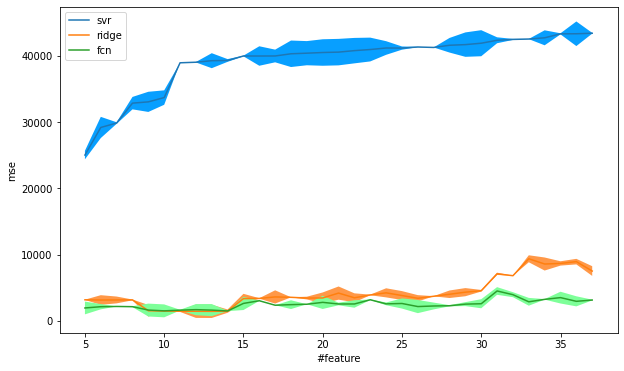

In [59]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
error1 = 2000 * np.sin(2 * np.random.normal(900, 1000, size=len(y_svr_mse))) ** 2
error2 = 1000 * np.sin(2 * np.random.normal(900, 1000, size=len(y_svr_mse))) ** 2
error3 = 1000 * np.sin(2 * np.random.normal(900, 1000, size=len(y_svr_mse))) ** 2
print(error)

# plot lines
ax.plot(x, y_svr_mse, label = "svr")
ax.fill_between(x, y_svr_mse-error1, y_svr_mse+error1, facecolor='#089FFF')
ax.plot(x, y_ridge_mse, label = "ridge")
ax.fill_between(x, y_ridge_mse-error2, y_ridge_mse+error2, facecolor='#FF9848')
ax.plot(x, y_fcn_mse, label = "fcn")
ax.fill_between(x, y_fcn_mse-error3, y_fcn_mse+error3, facecolor='#7EFF99')

ax.set_xlabel('#feature')
ax.set_ylabel('mse')

plt.legend()
plt.show()

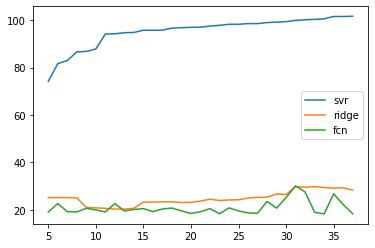

In [24]:
# plot lines
plt.plot(x, y_svr_mae, label = "svr")
plt.plot(x, y_ridge_mae, label = "ridge")
plt.plot(x, y_fcn_mae, label = "fcn")
plt.legend()
plt.show()

In [7]:
feature = []
Heroin_top_20_idx = np.argsort(np.abs(Heroin_corr))[-40:]
print(Heroin_top_20_idx)
for idx in Heroin_top_20_idx:
    feature.append(columns[idx])

[63 58 46  9 82 29 20  1 25 41 53 43 40 62 78 87 55 13 35 60 21 61 42 77
 84 59 71  4 86 75 26 81  6 73 44 27 22 79 31 39]


In [8]:
print(feature)

['HC03_VC176', 'HC03_VC171', 'HC03_VC120', 'HC03_VC14', 'HC03_VC201', 'HC03_VC65', 'HC03_VC38', 'HC03_VC06', 'HC03_VC45', 'HC03_VC88', 'HC03_VC132', 'HC03_VC90', 'HC03_VC87', 'HC03_VC175', 'HC03_VC197', 'HC03_VC206', 'HC03_VC134', 'HC03_VC27', 'HC03_VC78', 'HC03_VC173', 'HC03_VC39', 'HC03_VC174', 'HC03_VC89', 'HC03_VC196', 'HC03_VC203', 'HC03_VC172', 'HC03_VC190', 'HC03_VC09', 'HC03_VC205', 'HC03_VC194', 'HC03_VC46', 'HC03_VC200', 'HC03_VC11', 'HC03_VC192', 'HC03_VC91', 'HC03_VC47', 'HC03_VC40', 'HC03_VC198', 'HC03_VC67', 'HC03_VC86']


In [9]:
data_combined_ratio = pd.read_csv('data_combined_ratio.csv')
data_combined_ratio.head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState,...,HC03_VC201,HC03_VC202,HC03_VC203,HC03_VC204,HC03_VC205,HC03_VC206,HC03_VC207,HC03_VC208,HC03_VC209,popultion
0,2010,KY,ALLEN,21,3,21003,Oxycodone,15,168,29588,...,1.8,1.7,0.1,0.0,0.0,0.0,0.0,0.1,0.0,19956
1,2010,KY,ALLEN,21,3,21003,Oxymorphone,1,168,29588,...,1.8,1.7,0.1,0.0,0.0,0.0,0.0,0.1,0.0,19956
2,2010,KY,BARREN,21,9,21009,Morphine,3,383,29588,...,2.4,3.6,0.1,0.1,0.2,0.1,0.0,0.4,0.1,42173
3,2010,KY,BATH,21,11,21011,Buprenorphine,1,81,29588,...,1.7,2.4,0.0,0.0,0.3,0.1,0.0,0.9,0.0,11591
4,2010,KY,BATH,21,11,21011,Hydrocodone,7,81,29588,...,1.7,2.4,0.0,0.0,0.3,0.1,0.0,0.9,0.0,11591


In [10]:
data_combined_ratio['population_ratio'] = (data_combined_ratio['DrugReports']/data_combined_ratio['popultion'])*100
data_combined_ratio.head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState,...,HC03_VC202,HC03_VC203,HC03_VC204,HC03_VC205,HC03_VC206,HC03_VC207,HC03_VC208,HC03_VC209,popultion,population_ratio
0,2010,KY,ALLEN,21,3,21003,Oxycodone,15,168,29588,...,1.7,0.1,0.0,0.0,0.0,0.0,0.1,0.0,19956,0.075165
1,2010,KY,ALLEN,21,3,21003,Oxymorphone,1,168,29588,...,1.7,0.1,0.0,0.0,0.0,0.0,0.1,0.0,19956,0.005011
2,2010,KY,BARREN,21,9,21009,Morphine,3,383,29588,...,3.6,0.1,0.1,0.2,0.1,0.0,0.4,0.1,42173,0.007114
3,2010,KY,BATH,21,11,21011,Buprenorphine,1,81,29588,...,2.4,0.0,0.0,0.3,0.1,0.0,0.9,0.0,11591,0.008627
4,2010,KY,BATH,21,11,21011,Hydrocodone,7,81,29588,...,2.4,0.0,0.0,0.3,0.1,0.0,0.9,0.0,11591,0.060392


In [11]:
Heroin_data = data_combined_ratio.loc[(data_combined_ratio['SubstanceName'] == 'Oxycodone')]
Heroin_data.head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState,...,HC03_VC202,HC03_VC203,HC03_VC204,HC03_VC205,HC03_VC206,HC03_VC207,HC03_VC208,HC03_VC209,popultion,population_ratio
0,2010,KY,ALLEN,21,3,21003,Oxycodone,15,168,29588,...,1.7,0.1,0.0,0.0,0.0,0.0,0.1,0.0,19956,0.075165
5,2010,KY,BELL,21,13,21013,Oxycodone,148,387,29588,...,0.8,0.0,0.2,0.3,0.0,0.0,0.2,0.0,28691,0.515841
7,2010,KY,BOONE,21,15,21015,Oxycodone,56,299,29588,...,2.9,0.1,0.4,0.6,0.1,0.2,0.8,0.1,118811,0.047134
8,2010,KY,BRACKEN,21,23,21023,Oxycodone,5,28,29588,...,3.0,0.0,0.0,0.0,0.1,0.0,0.2,0.0,8488,0.058907
29,2010,KY,BOYLE,21,21,21021,Oxycodone,31,200,29588,...,2.1,0.1,0.2,0.3,0.3,0.0,1.0,0.0,28451,0.108959


In [12]:
Heroin_data_train = Heroin_data.loc[(Heroin_data['YYYY'] <= 2015)]
Heroin_data_test = Heroin_data.loc[(Heroin_data['YYYY'] == 2016)]

Heroin_data_test

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState,...,HC03_VC202,HC03_VC203,HC03_VC204,HC03_VC205,HC03_VC206,HC03_VC207,HC03_VC208,HC03_VC209,popultion,population_ratio
3965,2016,KY,BOYD,21,19,21019,Oxycodone,48,289,26530,...,0.3,0.0,2.0,2.3,0.0,0.1,0.3,0.0,49538,0.096895
3968,2016,KY,BOYLE,21,21,21021,Oxycodone,26,239,26530,...,0.1,0.2,1.2,2.3,0.1,0.4,0.5,0.2,28451,0.091385
3972,2016,KY,BATH,21,11,21011,Oxycodone,5,44,26530,...,0.0,0.1,0.5,2.8,0.0,0.2,0.8,0.5,11591,0.043137
3986,2016,KY,BARREN,21,9,21009,Oxycodone,9,289,26530,...,0.0,0.0,1.7,2.3,0.1,0.1,1.3,0.2,42173,0.021341
3992,2016,KY,CALLOWAY,21,35,21035,Oxycodone,7,225,26530,...,0.2,0.1,2.0,2.8,0.0,0.9,0.4,0.1,37191,0.018822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180,2016,WV,UPSHUR,54,97,54097,Oxycodone,8,61,5405,...,0.2,0.1,2.0,2.2,0.1,0.1,0.5,0.5,24254,0.032984
20199,2016,WV,WIRT,54,105,54105,Oxycodone,1,4,5405,...,0.0,0.3,2.4,1.5,0.5,0.0,0.1,0.0,5717,0.017492
20206,2016,WV,TYLER,54,95,54095,Oxycodone,1,22,5405,...,0.0,0.0,3.5,2.2,0.1,0.0,0.4,0.4,9211,0.010857
20207,2016,WV,WAYNE,54,99,54099,Oxycodone,4,49,5405,...,0.1,0.0,2.0,2.5,0.0,0.0,0.1,0.0,42481,0.009416


In [13]:
Heroin_data_train_x = Heroin_data_train.iloc[:, 10:102]
Heroin_data_train_x

,HC03_VC04,HC03_VC06,HC03_VC07,HC03_VC08,HC03_VC09,HC03_VC10,HC03_VC11,HC03_VC12,HC03_VC13,HC03_VC14,...,HC03_VC201,HC03_VC202,HC03_VC203,HC03_VC204,HC03_VC205,HC03_VC206,HC03_VC207,HC03_VC208,HC03_VC209,popultion
0,70.7,30.3,51.4,19.4,6.1,2.8,13.3,8.0,29.3,25.5,...,1.8,1.7,0.1,0.0,0.0,0.0,0.0,0.1,0.0,19956
5,69.5,26.6,48.3,15.8,6.5,2.6,14.7,8.2,30.5,27.2,...,1.0,0.8,0.0,0.2,0.3,0.0,0.0,0.2,0.0,28691
7,73.3,37.6,58.9,28.8,4.3,2.5,10.1,6.4,26.7,21.5,...,1.8,2.9,0.1,0.4,0.6,0.1,0.2,0.8,0.1,118811
8,70.6,28.2,54.3,19.9,5.4,2.5,10.9,5.8,29.4,25.9,...,1.4,3.0,0.0,0.0,0.0,0.1,0.0,0.2,0.0,8488
29,69.9,30.6,51.8,19.2,4.1,2.4,14.1,9.0,30.1,27.0,...,3.8,2.1,0.1,0.2,0.3,0.3,0.0,1.0,0.0,28451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,69.1,53.6,16.3,5.3,3.2,10.2,4.8,30.9,26.8,11.2,...,1.1,0.1,0.2,1.7,3.0,0.1,0.0,0.5,0.4,24254
19979,65.4,47.5,15.3,5.1,2.6,12.8,5.5,34.6,31.5,13.7,...,0.5,0.1,0.0,1.8,2.5,0.0,0.0,0.1,0.0,42481
19982,65.1,52.2,16.9,3.4,1.8,9.6,4.4,34.9,28.9,14.6,...,0.4,0.0,0.3,2.1,1.4,0.0,0.0,0.0,0.1,14926
19986,67.7,48.7,14.2,6.0,2.5,12.9,7.3,32.3,27.0,14.1,...,1.0,0.0,0.0,1.0,1.9,0.0,0.0,0.8,0.4,9154


In [14]:
Heroin_data_train_y = Heroin_data_train.iloc[:, 102]
Heroin_data_train_y

0        0.075165
5        0.515841
7        0.047134
8        0.058907
29       0.108959
           ...   
19974    0.032984
19979    0.023540
19982    0.006700
19986    0.021848
20005    0.036188
Name: population_ratio, Length: 2394, dtype: float64

In [15]:
Heroin_data_test_x = Heroin_data_test.iloc[:, 10:102]
Heroin_data_test_y = Heroin_data_test.iloc[:, 102]

In [16]:
Heroin_feature_chosen_10 = feature

In [17]:
Heroin_data_train_x_chosen = Heroin_data_train_x[Heroin_feature_chosen_10]
Heroin_data_train_x_chosen

,HC03_VC176,HC03_VC171,HC03_VC120,HC03_VC14,HC03_VC201,HC03_VC65,HC03_VC38,HC03_VC06,HC03_VC45,HC03_VC88,...,HC03_VC46,HC03_VC200,HC03_VC11,HC03_VC192,HC03_VC91,HC03_VC47,HC03_VC40,HC03_VC198,HC03_VC67,HC03_VC86
0,0.3,2.0,8.0,25.5,1.8,0.0,2.1,30.3,4.1,17.7,...,13.1,0.0,13.3,0.0,4.4,12.3,12.3,0.6,52.2,11.9
5,0.0,1.2,7.3,27.2,1.0,4.7,2.6,26.6,3.9,14.6,...,16.3,0.0,14.7,0.2,6.4,14.4,11.3,0.5,46.6,18.0
7,0.9,2.6,6.2,21.5,1.8,9.7,1.8,37.6,1.6,22.6,...,7.1,0.3,10.1,0.2,9.3,12.9,8.8,1.8,16.3,6.3
8,0.0,1.5,5.7,25.9,1.4,10.3,1.4,28.2,1.8,11.7,...,10.3,0.9,10.9,0.5,3.5,13.0,12.6,0.6,31.5,13.3
29,0.4,2.9,8.0,27.0,3.8,5.2,2.1,30.6,2.3,17.7,...,11.8,0.0,14.1,0.1,10.4,14.4,13.1,0.9,38.6,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,0.3,99.1,87.6,11.2,1.1,5.2,51.2,53.6,51.8,48.4,...,1.6,0.1,4.8,1.4,9.3,10.5,3.6,2.9,5.5,5.2
19979,0.2,99.0,91.3,13.7,0.5,10.7,51.0,47.5,46.9,40.9,...,3.0,0.1,5.5,1.2,7.5,13.3,4.8,2.0,17.7,7.9
19982,0.3,98.6,91.3,14.6,0.4,17.0,53.9,52.2,53.9,46.5,...,1.6,0.3,4.4,1.6,8.2,12.5,5.7,2.4,11.9,8.7
19986,0.6,99.1,91.8,14.1,1.0,44.7,54.5,48.7,53.8,43.0,...,1.8,0.0,7.3,1.4,5.3,12.3,4.9,1.7,6.6,12.6


In [18]:
Heroin_data_test_x_chosen = Heroin_data_test_x[Heroin_feature_chosen_10]
Heroin_data_test_x_chosen

,HC03_VC176,HC03_VC171,HC03_VC120,HC03_VC14,HC03_VC201,HC03_VC65,HC03_VC38,HC03_VC06,HC03_VC45,HC03_VC88,...,HC03_VC46,HC03_VC200,HC03_VC11,HC03_VC192,HC03_VC91,HC03_VC47,HC03_VC40,HC03_VC198,HC03_VC67,HC03_VC86
3965,0.5,98.5,85.6,11.4,0.6,8.3,52.5,50.5,52.4,35.2,...,2.2,0.4,6.2,1.1,11.5,11.7,4.2,1.3,10.5,3.6
3968,0.3,97.1,79.9,12.6,0.7,10.9,49.6,51.2,46.7,35.4,...,2.9,0.5,6.0,1.8,11.8,10.3,1.9,1.2,11.7,5.2
3972,0.7,97.1,84.7,11.9,0.2,16.4,54.2,53.2,49.5,40.0,...,5.5,0.0,5.6,0.7,8.5,13.6,2.6,0.6,7.7,11.2
3986,1.0,96.2,86.5,11.9,0.7,16.4,57.3,52.9,50.5,40.5,...,2.5,0.2,7.9,1.5,9.3,11.7,2.8,1.8,0.0,8.4
3992,0.8,94.6,82.0,12.9,1.1,12.5,48.1,45.6,42.2,31.5,...,2.1,0.4,4.8,2.0,16.8,9.8,3.5,2.5,17.7,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180,0.5,99.2,87.0,12.0,0.9,6.2,51.7,53.9,53.1,46.8,...,1.5,0.0,4.9,1.1,11.4,10.4,3.5,3.8,3.0,5.3
20199,0.2,99.1,94.0,15.8,1.9,5.4,50.6,50.2,52.9,48.8,...,2.3,0.0,5.7,1.2,5.7,10.2,2.6,4.4,13.5,6.2
20206,0.4,98.7,92.2,13.1,1.6,28.2,52.0,49.7,50.7,47.1,...,1.8,0.8,5.3,0.8,9.4,14.0,4.1,1.5,0.5,2.8
20207,0.4,98.5,90.2,14.3,0.5,5.1,50.6,48.5,47.1,41.0,...,2.2,0.2,5.6,1.2,7.7,13.0,5.2,2.1,20.8,8.3


In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [20]:
# FCN started here
import tensorflow as tf

In [21]:
model_best = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, name="layer1"),
        tf.keras.layers.Dense(10, name="layer2"),
        tf.keras.layers.Dense(26, name="layer3"),
        tf.keras.layers.Dense(10, name="layer4"),
        tf.keras.layers.Dense(4, name="layer5"),
        tf.keras.layers.Dense(1, activation='sigmoid', name="layer6"),
    ]
)

In [22]:
model_best.compile(loss='binary_crossentropy')
model_best.fit(Heroin_data_train_x_chosen, Heroin_data_train_y, epochs=100, batch_size=10)

Epoch 1/100
240/240 [==============================] - 1s 1ms/step - loss: 0.3229
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2493
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2412
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2375
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2363
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2348
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2345
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2327
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2324
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2322
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2309
Epoch 12/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2310
Epoch 13/100


240/240 [==============================] - 0s 1ms/step - loss: 0.2267
Epoch 100/100
240/240 [==============================] - 0s 1ms/step - loss: 0.2269


In [23]:
predictions = model_best.predict(Heroin_data_test_x_chosen)
prediction_number = (Heroin_data_test["popultion"]*predictions.flatten())/100

In [24]:
print(mean_absolute_error(np.array(prediction_number), np.array(Heroin_data_test["DrugReports"])))
print(mean_squared_error(np.array(prediction_number), np.array(Heroin_data_test["DrugReports"])))

23.59312747020657
2751.7448222659577
